## Import Libraries and Database

In [7]:
# Call the libraries
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as ptl

# Load the database
data = pd.read_csv("CTG.csv")

# Delete the first column
data = data.drop(data.columns[0], axis=1)

data.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0,0,0,73,0.5,43,2.4,0,0,...,62,126,2,0,120,137,121,73,1,2
1,132,4,0,4,17,2.1,0,10.4,2,0,...,68,198,6,1,141,136,140,12,0,1
2,133,2,0,5,16,2.1,0,13.4,2,0,...,68,198,5,1,141,135,138,13,0,1
3,134,2,0,6,16,2.4,0,23.0,2,0,...,53,170,11,0,137,134,137,13,1,1
4,132,4,0,5,16,2.4,0,19.9,0,0,...,53,170,9,0,137,136,138,11,1,1


## Create the Dataframe

In [8]:
df_data = pd.DataFrame(data)
df_data = df_data.drop(columns=["NSP"])
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   int64  
 2   FM        2126 non-null   int64  
 3   UC        2126 non-null   int64  
 4   ASTV      2126 non-null   int64  
 5   MSTV      2126 non-null   float64
 6   ALTV      2126 non-null   int64  
 7   MLTV      2126 non-null   float64
 8   DL        2126 non-null   int64  
 9   DS        2126 non-null   int64  
 10  DP        2126 non-null   int64  
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  Tendency  2126 non-null   int6

## Separate the Dataframe for Training, Testing and Validation

In [9]:
from sklearn.model_selection import train_test_split

# Separate 50% of the data for training
x_train, x_temp, y_train, y_temp = train_test_split(df_data, data["NSP"], test_size=0.5, random_state=42)

# Separate 25% of the data for validation and 25% for testing
x_validation, x_test, y_validation, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

## Find The Best Model

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

higher_acc = -1
models_acc = []

# Test the different models
for i in ("gini", "entropy"):
    for j in ("best", "random"):
        for k in range(5, 21):
            for l in range(2, 20):
                DT = DecisionTreeClassifier(criterion=i, splitter=j, max_depth=k, min_samples_leaf=l)
                DT.fit(x_train, y_train)
                pred = DT.predict(x_validation)
                
                # Save the best model
                if accuracy_score(y_validation, pred) > higher_acc:
                    best_model = DT
                    best_criterion = i
                    best_splitter = j
                    best_depth = k
                    best_leaf = l
                    higher_acc = accuracy_score(y_validation, pred)
            
                # Save the accuracy of each model
                models_acc.append(accuracy_score(y_validation, pred))
                

## Plot the Accuracy of Each Model

Melhor Critério: entropy  Melhor Divisão: best  Melhor Profundidade: 10  Melhor Número de Folhas: 5


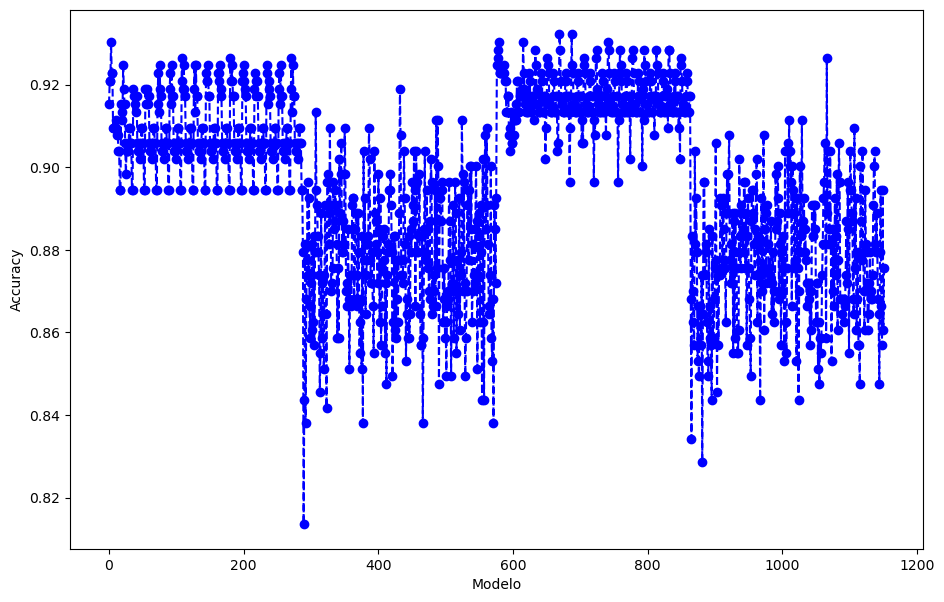

In [11]:
# Graph the accuracy of each model
ptl.figure (figsize=(11,7))
ptl.plot(range(len(models_acc)), models_acc, color='blue', linestyle='dashed', marker='o')
ptl.xlabel('Modelo')
ptl.ylabel('Accuracy')

# Show the best model
print("Melhor Critério:", best_criterion, " Melhor Divisão:", best_splitter, " Melhor Profundidade:", best_depth, " Melhor Número de Folhas:", best_leaf)

## Test The Best Model

In [12]:
from sklearn.metrics import confusion_matrix

pred = best_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print("Acurácia:", acc)
confusion_matrix(y_test, pred)

Acurácia: 0.9342105263157895


array([[399,  10,   2],
       [ 13,  66,   2],
       [  7,   1,  32]])